# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
! pip install citipy

In [2]:
import matplotlib.pyplot as plt
import requests
from scipy import stats as st
import pandas as pd
import gmaps
from api_keys import g_key, weather_api_key
from citipy import citipy
import numpy as np
import time

In [3]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

open_weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
open_weather_query_url = f"{open_weather_url}appid={weather_api_key}&units={units}&q="
open_weather_query_url

'http://api.openweathermap.org/data/2.5/weather?appid=fa2f99328a661e39490ba25362be145d&units=metric&q='

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=1500)
lngs = np.random.uniform(low=lng_range[0], high=lng_range[1], size=1500)

# Zip
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Show city count to confirm sufficient count
len(cities)

622

In [5]:
# Creating an empty dataframe with these columns "City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lon", "Max Temp", "Wind Speed"
cities_df = pd.DataFrame(columns=["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lon", "Max Temp", "Wind Speed"])

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#Print initial heading for print log
print("Starting Data Retrieval")
print("------------------------")

# Sets and records counter
sets = 1
records = 1

# Define max calls
max_calls = 50

# Iterate through each city and request the weather data
for city in cities:

    # Try & except for API call
    try:
        # Api request response converted to json
        response = requests.get(open_weather_query_url + city).json()
        
        # Get data
        data = {
            "City": response['name'],
            "Cloudiness": response['clouds']['all'],
            "Country": response['sys']['country'],
            "Date": response['dt'], "Humidity": response['main']['humidity'],
            "Lat": response['coord']['lat'],
            "Lon": response['coord']['lon'],
            "Max Temp": response['main']['temp_max'],
            "Wind Speed": response['wind']['speed']
        }
         

        # Add data to dataframe
        cities_df = cities_df.append(data, ignore_index = True)

        print(f"Processing Record {records} of Set {sets} | {city.upper()}") # Logging progress
        
        # Sleep time to stay within API call rate limits
        time.sleep(1.2)
        
        # Increment record count
        records += 1

        # If records count matches max_calls limit, increase set count and reset records to 1
        if records == max_calls:
            sets += 1
            records = 1


    except (KeyError, IndexError):
        print(f"City not found | {city.upper()}") # Logging failure

print("-----------------------")
print("Data Retrieval Complete")



Starting Data Retrieval
------------------------
Processing Record 1 of Set 1 | LA RONGE
Processing Record 2 of Set 1 | JAMESTOWN
Processing Record 3 of Set 1 | SMITHERS
City not found | BELUSHYA GUBA
Processing Record 4 of Set 1 | ALBANY
Processing Record 5 of Set 1 | TUKTOYAKTUK
Processing Record 6 of Set 1 | BUSSELTON
Processing Record 7 of Set 1 | RAUDEBERG
Processing Record 8 of Set 1 | TASIILAQ
Processing Record 9 of Set 1 | SEVERO-KURILSK
Processing Record 10 of Set 1 | EAST LONDON
City not found | MYS SHMIDTA
Processing Record 11 of Set 1 | SALDANHA
Processing Record 12 of Set 1 | RIKITEA
Processing Record 13 of Set 1 | SUMBE
Processing Record 14 of Set 1 | NEWPORT
Processing Record 15 of Set 1 | YULARA
Processing Record 16 of Set 1 | PHAN THIET
Processing Record 17 of Set 1 | USHUAIA
Processing Record 18 of Set 1 | BENGKULU
Processing Record 19 of Set 1 | ARRAIAL DO CABO
Processing Record 20 of Set 1 | PISCO
City not found | ANDEVORANTO
Processing Record 21 of Set 1 | NALUT
Pr

Processing Record 45 of Set 4 | HOBART
City not found | TSIHOMBE
Processing Record 46 of Set 4 | JAMAME
Processing Record 47 of Set 4 | BOSE
Processing Record 48 of Set 4 | IBATE
Processing Record 49 of Set 4 | TUATAPERE
Processing Record 1 of Set 5 | LUJAN
Processing Record 2 of Set 5 | SEVERNYY-KOSPASHSKIY
Processing Record 3 of Set 5 | CHERSKIY
Processing Record 4 of Set 5 | PORT LINCOLN
Processing Record 5 of Set 5 | MIRABAD
Processing Record 6 of Set 5 | LUDERITZ
Processing Record 7 of Set 5 | MAKAKILO CITY
Processing Record 8 of Set 5 | SORLAND
Processing Record 9 of Set 5 | ANKAZOABO
Processing Record 10 of Set 5 | KRISTIINANKAUPUNKI
Processing Record 11 of Set 5 | VERKHNYAYA INTA
Processing Record 12 of Set 5 | VAMMALA
City not found | TEMARAIA
Processing Record 13 of Set 5 | ALICE SPRINGS
Processing Record 14 of Set 5 | VAO
Processing Record 15 of Set 5 | MANEROMANGO
Processing Record 16 of Set 5 | BELOHA
Processing Record 17 of Set 5 | CACHIRA
Processing Record 18 of Set 5 | 

Processing Record 33 of Set 8 | KATSUURA
Processing Record 34 of Set 8 | ROCHEGDA
Processing Record 35 of Set 8 | TOMMOT
Processing Record 36 of Set 8 | DAVILA
Processing Record 37 of Set 8 | NOUAKCHOTT
Processing Record 38 of Set 8 | BATTICALOA
Processing Record 39 of Set 8 | GAFFNEY
City not found | DEH RAWUD
Processing Record 40 of Set 8 | BLOEMHOF
Processing Record 41 of Set 8 | BATAGAY-ALYTA
Processing Record 42 of Set 8 | POSO
Processing Record 43 of Set 8 | BJORNEVATN
Processing Record 44 of Set 8 | CAP MALHEUREUX
Processing Record 45 of Set 8 | NOVYY URENGOY
Processing Record 46 of Set 8 | ARIQUEMES
Processing Record 47 of Set 8 | QIRYAT SHEMONA
Processing Record 48 of Set 8 | DINDORI
Processing Record 49 of Set 8 | KUTUM
Processing Record 1 of Set 9 | SIOUX LOOKOUT
Processing Record 2 of Set 9 | KISANGANI
Processing Record 3 of Set 9 | SENNO
Processing Record 4 of Set 9 | SUNGAIPENUH
Processing Record 5 of Set 9 | SAO JOAQUIM
Processing Record 6 of Set 9 | LUWINGU
City not fou

Processing Record 21 of Set 12 | PORT JERVIS
Processing Record 22 of Set 12 | PALMITAL
City not found | GORNO-CHUYSKIY
Processing Record 23 of Set 12 | MANCHERAL
Processing Record 24 of Set 12 | MANIITSOQ
Processing Record 25 of Set 12 | ARAOUANE
Processing Record 26 of Set 12 | XUDDUR
Processing Record 27 of Set 12 | CURURUPU
Processing Record 28 of Set 12 | BEREDA
Processing Record 29 of Set 12 | HIBBING
-----------------------
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Output file (CSV)
output_data_file = "../output_data/cities_data.csv"
cities_df.to_csv(output_data_file)

In [8]:
cities_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,La Ronge,90,CA,1601601191,61,55.10,-105.28,8,1
1,Jamestown,90,US,1601601193,87,42.10,-79.24,9.44,2.6
2,Smithers,40,CA,1601601195,59,54.78,-127.17,19,2.1
3,Albany,23,US,1601601198,69,42.60,-73.97,12.78,1.81
4,Tuktoyaktuk,90,CA,1601601200,100,69.45,-133.04,4,5.7
5,Busselton,79,AU,1601601202,69,-33.65,115.33,13.89,6.17
6,Raudeberg,54,NO,1601601204,49,61.99,5.14,15.56,5.19
7,Tasiilaq,100,GL,1601601206,98,65.61,-37.64,0,13.9
8,Severo-Kuril'sk,100,RU,1601601209,74,50.68,156.12,10.42,2.37
9,East London,100,ZA,1601601211,73,-33.02,27.91,14.7,7.14


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
cities_df[cities_df['Humidity'] > 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

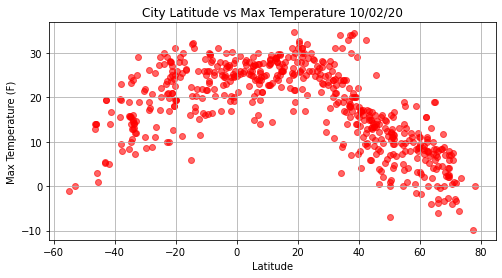

This graph demonstrates the correlation that as we move away from the equator the temperature drops


In [12]:
# Today's date
today = time.strftime("%m/%d/%y")

# Plot the Latitude vs. Temp data with analysis 
plt.figure(figsize=(8,4))
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], color='r', alpha=0.6)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel(f"Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature {today}")
plt.savefig('../output_data/latitude_vs_temp.png')
plt.show()
print(f"This graph demonstrates the correlation that as we move away from the equator the temperature drops")

## Latitude vs. Humidity Plot

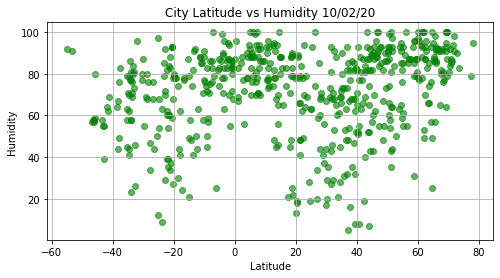

This graph shows that there is no significant correlation bewteen these two factors


In [13]:
# Plot the Latitude vs Humidity with analysis
plt.figure(figsize=(8,4))
plt.scatter(cities_df["Lat"], cities_df["Humidity"], color='g', alpha=0.6)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel(f"Humidity")
plt.title(f"City Latitude vs Humidity {today}")
plt.savefig('../output_data/latitude_vs_humidity.png')
plt.show()
print(f"This graph shows that there is no significant correlation bewteen these two factors")

## Latitude vs. Cloudiness Plot

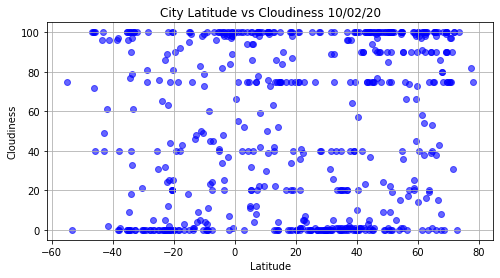

This graph shows that there is no significant correlation bewteen these two factors


In [14]:
# Plot the Latitude vs Cloudiness with analysis
plt.figure(figsize=(8,4))
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], color='b', alpha=0.6)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel(f"Cloudiness")
plt.title(f"City Latitude vs Cloudiness {today}")
plt.savefig('../output_data/latitude_vs_cloudiness.png')
plt.show()
print(f"This graph shows that there is no significant correlation bewteen these two factors")

## Latitude vs. Wind Speed Plot

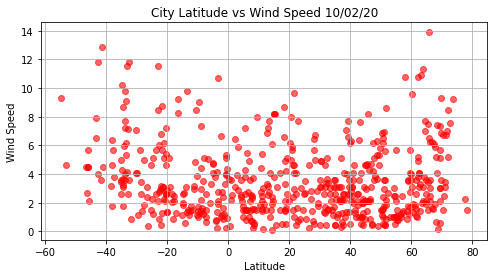

This graph shows that there is no significant correlation bewteen these two factors


In [15]:
# Plot the Latitude vs Wind Speed with analysis
plt.figure(figsize=(8,4))
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], color='r', alpha=0.6)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel(f"Wind Speed")
plt.title(f"City Latitude vs Wind Speed {today}")
plt.savefig('../output_data/latitude_vs_windspeed.png')
plt.show()
print(f"This graph shows that there is no significant correlation bewteen these two factors")

## Linear Regression

In [16]:
cities_northern_df = cities_df.loc[cities_df["Lat"] > 0.00, :]
cities_southern_df = cities_df.loc[cities_df["Lat"] < 0.00, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.816475599894789


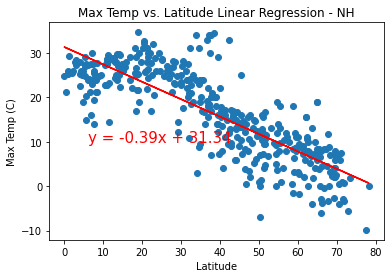

In [18]:
# Plot the northern hemisphere temp vs lat
x_values = cities_northern_df['Lat'].astype(float)
y_values = cities_northern_df['Max Temp'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Max Temp (C)')
plt.title('Max Temp vs. Latitude Linear Regression - NH')
print(f"The r-squared is: {rvalue}")
plt.savefig('../output_data/northern_max_vs_temp_regression.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.608320432574901


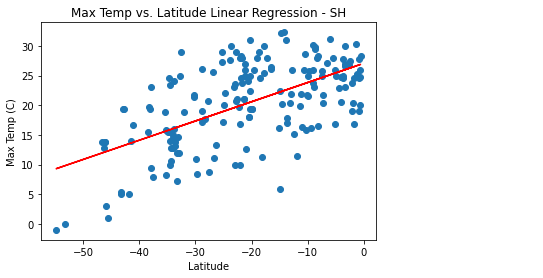

In [19]:
# Plot the sothern hemisphere temp vs lat
x_values = cities_southern_df['Lat'].astype(float)
y_values = cities_southern_df['Max Temp'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Max Temp (C)')
plt.title('Max Temp vs. Latitude Linear Regression - SH')
print(f"r-squared: {rvalue}")
plt.savefig('../output_data/Southern_max_vs_temp_regression.png')
plt.show()

### Insight

The comparrison of the temperatures within the northern and sothern hemisphere's against latitude demonstrates that the temperature in creases as you approach the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.1386560773324017


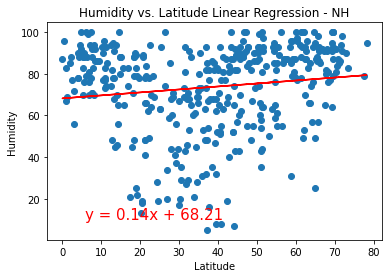

In [20]:
# Plot the northern hemisphere humidity vs lat
x_values = cities_northern_df['Lat'].astype(float)
y_values = cities_northern_df['Humidity'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Humidity')
plt.title('Humidity vs. Latitude Linear Regression - NH')
print(f"r-squared: {rvalue}")
plt.savefig('../output_data/northern_humidity_regression.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2528841921233832


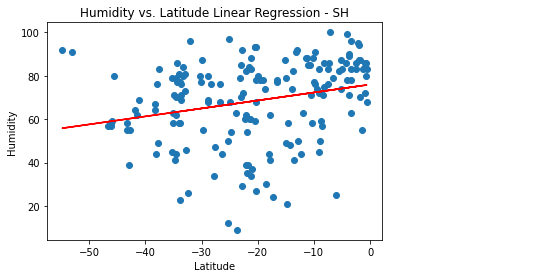

In [21]:
# Plot the southern hemisphere humidity vs lat
x_values = cities_southern_df['Lat'].astype(float)
y_values = cities_southern_df['Humidity'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Humidity')
plt.title('Humidity vs. Latitude Linear Regression - SH')
print(f"The r-squared is: {rvalue}")
plt.savefig('../output_data/Southern_humidity_regression.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.14270068405533506


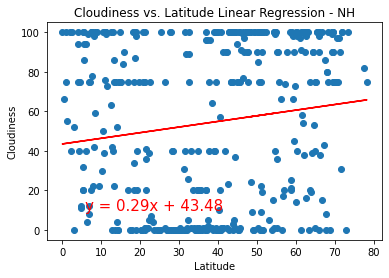

In [22]:
# Plot the northern hemisphere cloudiness vs lat
x_values = cities_northern_df['Lat'].astype(float)
y_values = cities_northern_df['Cloudiness'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Cloudiness')
plt.title('Cloudiness vs. Latitude Linear Regression - NH')
print(f"r-squared: {rvalue}")
plt.savefig('../output_data/northern_cloudiness_regression.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.04955316292081805


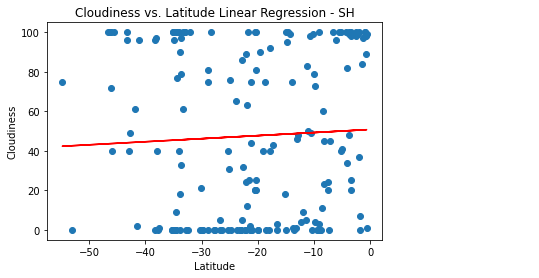

In [23]:
# Plot the southern hemisphere cloudiness vs lat
x_values = cities_southern_df['Lat'].astype(float)
y_values = cities_southern_df['Cloudiness'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Cloudiness')
plt.title('Cloudiness vs. Latitude Linear Regression - SH')
print(f"r-squared: {rvalue}")
plt.savefig('../output_data/northern_cloudiness_regression.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.1415110331543163


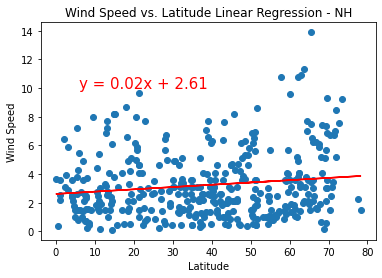

In [25]:
# Plot the northern hemisphere wind speed vs lat
x_values = cities_northern_df['Lat'].astype(float)
y_values = cities_northern_df['Wind Speed'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Wind Speed')
plt.title('Wind Speed vs. Latitude Linear Regression - NH')
print(f"r-squared: {rvalue}")
plt.savefig('../output_data/northern_windspeed_regression.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.3451451867313507


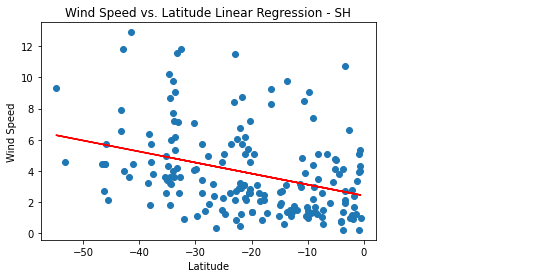

In [27]:
#Plot the southern hemisphere wind speed vs lat
x_values = cities_southern_df['Lat'].astype(float)
y_values = cities_southern_df['Wind Speed'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Wind Speed')
plt.title('Wind Speed vs. Latitude Linear Regression - SH')
print(f"r-squared: {rvalue}")
plt.savefig('../output_data/northern_windspeed_regression.png')
plt.show()